# Reading 10X Cell Ranger output directly
![dandelion_logo](img/dandelion_logo_illustration.png)

If for whatever reason you've decided to skip the reannotation/preprocessing, you can read the files directly from the Cell Ranger output folder with `Dandelion`'s `ddl.read_10x_vdj`, which accepts the `*_contig_annotations.csv` or `all_contig_annotations.json` file(s) as input. If reading with the `.csv` file, and the `.fasta` file and/or `.json` file(s) are in the same folder, `ddl.read_10x_vdj` will try to extract additional information not found in the `.csv` file e.g. contig sequences.

From **Cell Ranger V4** onwards, there is also an `airr_rearrangement.tsv` file that can be used directly with `Dandelion`. However, doing so will miss out on the reannotation steps but that is entirely up to you.

We will download the *airr_rearrangement.tsv* file from here:
```bash
# bash
wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_filtered_contig_annotations.csv
wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_filtered_contig.fasta
# wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_all_contig_annotations.json
wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_airr_rearrangement.tsv
```


**Import *dandelion* module**

In [1]:
import os
import dandelion as ddl
# change directory to somewhere more workable
os.chdir(os.path.expanduser('/Users/kt16/Downloads/dandelion_tutorial/'))
ddl.logging.print_versions()

dandelion==0.1.5.dev40 pandas==1.2.3 numpy==1.21.0 matplotlib==3.3.4 networkx==2.6 scipy==1.7.0 skbio==0.5.6


With `ddl.read_10x_vdj`:

In [2]:
folder_location = 'sc5p_v2_hs_PBMC_10k'
# or file_location = 'sc5p_v2_hs_PBMC_10k/'
vdj = ddl.read_10x_vdj(folder_location, filename_prefix='sc5p_v2_hs_PBMC_10k_b_filtered', verbose = True)
vdj

Reading sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_filtered_contig_annotations.csv
Found sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_filtered_contig.fasta file. Extracting extra information.


Dandelion class object with n_obs = 985 and n_contigs = 2601
    data: 'cell_id', 'sequence_id', 'sequence', 'productive', 'complete_vdj', 'locus', 'v_call', 'd_call', 'j_call', 'c_call', 'junction', 'junction_aa', 'consensus_count', 'duplicate_count', 'sequence_length_10x', 'high_confidence_10x', 'is_cell_10x', 'cdr3_aa', 'cdr3', 'clone_id', 'raw_consensus_id_10x'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'v_call_VJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ_0', 'duplicate_count_VDJ_1', 'duplicate_count_VDJ_2', 'duplicate_count_VDJ_3', 'duplicate_count_VDJ_4', 'duplicate_count_VJ_0', 'duplicate_count_VJ_1', 'duplicate_count_VJ_2', 'duplicate_count_VJ_3', 'duplicate_count_VJ_4', 'junction_aa_VDJ', 'junction_aa_VJ', 'status', 'status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'constant_status_summary'
    dis

With `ddl.read_10x_airr`:

In [3]:
# read in the airr_rearrangement.tsv file
file_location = 'sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_airr_rearrangement.tsv'
vdj = ddl.read_10x_airr(file_location)
vdj

Dandelion class object with n_obs = 978 and n_contigs = 2093
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'duplicate_count', 'is_cell', 'locus'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'v_call_VJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ_0', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_0', 'duplicate_count_VJ_1', 'junction_aa_VDJ', 'junction_aa_VJ', 'status', 'status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'constant_status_summary'

We will continue with the rest of the filtering part of the analysis to show how it slots smoothly with the rest of the workflow.

**Import modules for use with scanpy**

In [4]:
import pandas as pd
import numpy as np
import scanpy as sc
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata

warnings.filterwarnings('ignore')
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.6 umap==0.4.6 numpy==1.21.0 scipy==1.7.0 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3


**Import the transcriptome data**

In [5]:
adata = sc.read_10x_h5('sc5p_v2_hs_PBMC_10k/filtered_feature_bc_matrix.h5', gex_only=True)
adata.obs['sample_id'] = 'sc5p_v2_hs_PBMC_10k'
adata.var_names_make_unique()
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 10553 × 36601
    obs: 'sample_id'
    var: 'gene_ids', 'feature_types', 'genome'

Run QC on the transcriptome data.

In [6]:
ddl.pp.recipe_scanpy_qc(adata)
adata

AnnData object with n_obs × n_vars = 10553 × 36601
    obs: 'sample_id', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna'
    var: 'gene_ids', 'feature_types', 'genome'

Run the filtering of bcr data. Note that I'm using the `Dandelion` object as input rather than the pandas dataframe (yes both types of input will works. In fact, a file path to the .tsv will work too).

In [7]:
# The function will return both objects. 
vdj, adata = ddl.pp.filter_contigs(vdj, adata)

Annotating in anndata obs slot : 100%|██████████| 10553/10553 [00:00<00:00, 226370.70it/s]


Finishing up filtering
Initializing Dandelion object


**Check the output V(D)J table**

The vdj table is returned as a `Dandelion` class object in the `.data` slot; if a file was provided for `filter_bcr` above, a new file will be created in the same folder with the `filtered` prefix. Note that this V(D)J table is indexed based on contigs (sequence_id).

In [8]:
vdj

Dandelion class object with n_obs = 345 and n_contigs = 690
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'duplicate_count', 'is_cell', 'locus', 'umi_count'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'v_call_VJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ_0', 'duplicate_count_VJ_0', 'duplicate_count_VJ_1', 'junction_aa_VDJ', 'junction_aa_VJ', 'status', 'status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'constant_status_summary'
    distance

**Check the AnnData object as well**

And the `AnnData` object is indexed based on cells.

In [9]:
adata

AnnData object with n_obs × n_vars = 10553 × 36601
    obs: 'sample_id', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig'
    var: 'gene_ids', 'feature_types', 'genome'

**The number of cells that actually has a matching BCR can be tabluated.**

In [10]:
pd.crosstab(adata.obs['has_contig'], adata.obs['filter_contig'])

filter_contig,False,True
has_contig,,
No_contig,6328,3241
True,348,636


In [11]:
pd.crosstab(adata.obs['has_contig'], adata.obs['contig_QC_pass'])

contig_QC_pass,False,No_contig,True
has_contig,,,
No_contig,0,9569,0
True,639,0,345


In [12]:
pd.crosstab(adata.obs['contig_QC_pass'], adata.obs['filter_contig'])

filter_contig,False,True
contig_QC_pass,,
False,3,636
No_contig,6328,3241
True,345,0


**Now actually filter the AnnData object and run through a standard workflow starting by filtering genes and normalizing the data**

Because the 'filtered' `AnnData` object was returned as a filtered but otherwise unprocessed object, we still need to normalize and run through the usual process here. The following is just a standard scanpy workflow.

In [13]:
# filter genes
sc.pp.filter_genes(adata, min_cells=3)
# Normalize the counts
sc.pp.normalize_total(adata, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata)
# Stash the normalised counts
adata.raw = adata

**Identify highly-variable genes**

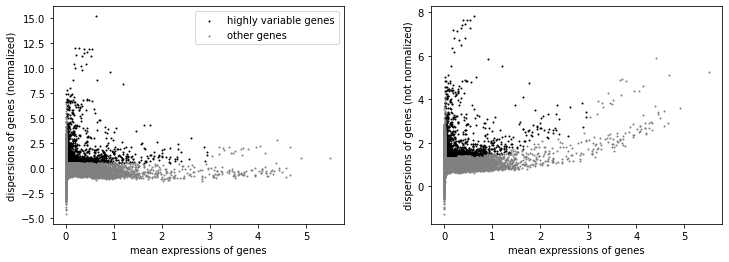

In [14]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

**Filter the genes to only those marked as highly-variable**

In [15]:
adata = adata[:, adata.var.highly_variable]

**Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.**

In [16]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

Trying to set attribute `.obs` of view, copying.
... storing 'sample_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'is_doublet' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'filter_rna' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'has_contig' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'filter_contig_quality' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'filter_contig_VDJ' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'filter_contig_VJ' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'contig_QC_pass' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'genome' as categorical


**Run PCA**

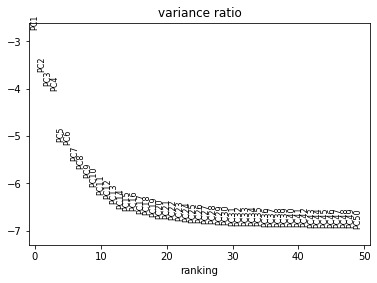

In [17]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

**Computing the neighborhood graph, umap and clusters**

In [18]:
# Computing the neighborhood graph
sc.pp.neighbors(adata)
# Embedding the neighborhood graph
sc.tl.umap(adata)
# Clustering the neighborhood graph
sc.tl.leiden(adata)

**Visualizing the clusters and whether or not there's a corresponding BCR**

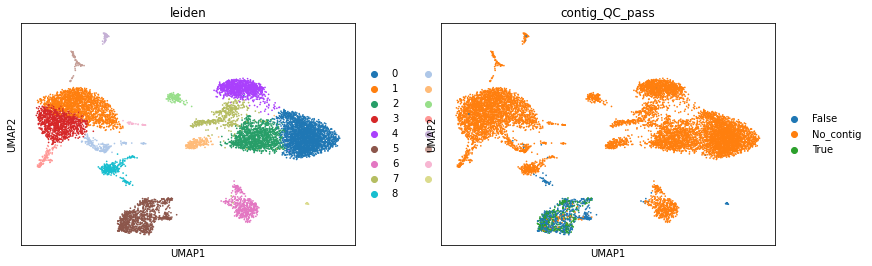

In [19]:
sc.pl.umap(adata, color=['leiden', 'contig_QC_pass'])

**Visualizing some B cell genes**

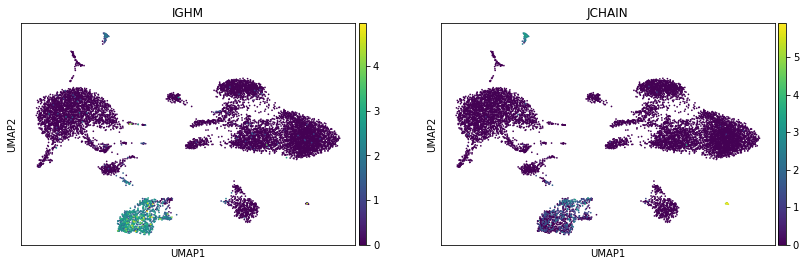

In [20]:
sc.pl.umap(adata, color=['IGHM', 'JCHAIN'])

**Save AnnData**

We can save this `AnnData` object for now.

In [21]:
adata.write('adata2.h5ad', compression = 'gzip')

... storing 'feature_types' as categorical
... storing 'genome' as categorical


**Save dandelion**

To save the vdj object, we have two options - either save the `.data` and `.metadata` slots with pandas' functions:

In [22]:
vdj.data.to_csv('filtered_vdj_table2.tsv', sep = '\t')

In [23]:
vdj.write_h5('dandelion_results2.h5', complib = 'bzip2')